In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Importation des données

In [5]:
data = {
    f"data{i}": np.loadtxt(f"./data/data_tp{i}_app.txt") for i in range(1, 4)
}

valid_data = {
    f"data{i}": np.loadtxt(f"./data/data_tp{i}_dec.txt") for i in range(1, 4)
}

In [6]:
# image gif
description = {
    f"desc_tp{i}": plt.imread(f"./data/data_tp{i}_app.gif") for i in range(1, 4)
}


# Fonctions ou classes utiles

In [37]:
def top_k_accuracy(X, mean, predictor, k=1):
    """Computes the top-k accuracy of a predictor on a dataset

    Parameters
    ----------
    X : 2D array
        Features of the dataset
    mean : 1D array
        Mean of the dataset
    predictor : (x : 2D array) -> 1D array
        Function that predicts the label of a feature vector
    k : int, optional
        Number of top elements to consider (default is 1)

    Returns
    -------
    float
        Top-k accuracy
    """
    labels = np.array([predictor(x) for x in X])
    return np.mean([y in np.argsort(mean)[:-k-1:-1] for y in labels])




def validate(valid_data, predictor):
    
    x_valid, y_valid = valid_data[["x1", "x2"]].to_numpy(), valid_data.y.to_numpy()
    classes = np.unique(y_valid)

    y_pred = predictor(x_valid)
    valid_data["y_pred"] = y_pred
    erreurs = np.array(y_pred != y_valid).astype(int)
    erreurs = np.sum(erreurs)
    erreurs_percent = 100*erreurs/y_valid.size

    matrice_confusion = np.zeros((len(classes), len(classes)))
    matrice_confusion = pd.DataFrame(matrice_confusion)
    matrice_confusion.columns =  np.arange(len(classes))
    matrice_confusion.index = matrice_confusion.columns


    
    for classe1 in  range(len(classes)):
        for classe2 in  range(len(classes)):
            matrice_confusion.loc[classe1, classe2] = valid_data[(valid_data.y_pred == classe1+1) & (valid_data.y == classe2+1)].shape[0]

    # matrice_confusion.fillna(0, inplace=True)

    if len(classes) == 2:
        plt.figure()

        plt.text(.5, .8, f"erreurs : {erreurs}", fontsize=14, ha='center', va='center')
        plt.text(.5, .7, f"Pourcentage des erreurs : {erreurs_percent} %", fontsize=14, ha='center', va='center')
        plt.text(.5, .5, f"matrices de confusion :\n {matrice_confusion}", fontsize=14, ha='center', va='center')

        plt.axis('off')
        plt.show()

        plt.figure()
        
        plt.text(0, 0, f"vrai positive : {matrice_confusion.loc[0, 0]}", ha='center', fontsize=12, va='center', color='red')
        plt.text(1, 0, f"faux positive : {matrice_confusion.loc[0, 1]}", ha='center', fontsize=12,  va='center', color='red')
        plt.text(0, 1, f"faux negative : {matrice_confusion.loc[1, 0]}", ha='center', fontsize=12, va='center', color='red')
        plt.text(1, 1, f"vrai negative : {matrice_confusion.loc[1, 1]}", ha='center', fontsize=12, va='center', color='red')

        plt.axis("off")
        plt.imshow(matrice_confusion, cmap='YlGnBu', interpolation='nearest')
        plt.show()
    else:
        plt.figure(figsize=(8, 6))
        sns.heatmap(matrice_confusion, annot=True, cmap='coolwarm', fmt='.1f', linewidths=.5)
        plt.title('Heatmap')
        plt.xlabel('Columns')
        plt.ylabel('Rows')
        plt.show()


       
    print("erreurs :", erreurs)
    print(f"Pourcentage des erreurs : {erreurs_percent} %")
    print(f"matrices de confusion :\n {matrice_confusion}")
    return erreurs_percent, matrice_confusion

def show(df, save=True, title=None, delta =None):
    
    classes = df.y.unique()
    marker =  ["+","x",".","o",",","*","v","^","<",">","1","2","3","4","8","s","p","P","*","h","H","X","D","d","|","_",0,1,2,3,4,5,6,7,8,9,10,11]
    repartitons = {classe : df[df.y == classe] for classe in classes}
    
    plt.figure(figsize=(10, 8))
    
    for i, classe in enumerate(classes):
        card = repartitons[classe].size
        plt.scatter(repartitons[classe].x1, repartitons[classe].x2, marker=marker[i], alpha=.7, label=f"{str(classe)}, {card}")


    if title is not None:
        plt.title(title)

    if delta is not None:
        for deltai in delta:
            plt.axvline(deltai )
            plt.text(deltai, 2, f"{np.round(deltai)}")

    plt.axis("equal")
    plt.legend()

def plot_decision(x1_min, x1_max, x2_min, x2_max, prediction, sample = 300):
    """Uses Matplotlib to plot and fill a region with 2 colors
    corresponding to 2 classes, separated by a decision boundary

    Parameters
    ----------
    x1_min : float
        Minimum value for the first feature
    x1_max : float
        Maximum value for the first feature
    x2_min : float
        Minimum value for the second feature
    x2_max : float
        Maximum value for the second feature
    prediction :  (x : 2D vector) -> label : int
        Prediction function for decision
    sample : int, optional
        Number of samples on each feature (default is 300)
    """
    x1_list = np.linspace(x1_min, x1_max, sample)
    x2_list = np.linspace(x2_min, x2_max, sample)
    y_grid_pred = [[prediction(np.array([x1,x2])) for x1 in x1_list] for x2 in x2_list] 
    plt.contourf(x1_list, x2_list, y_grid_pred, levels=1,alpha=0.35)


def plot_decision_multi(x1_min, x1_max, x2_min, x2_max, prediction, sample = 300):
    """Uses Matplotlib to plot and fill a region with 2 colors
    corresponding to 2 classes.

    Parameters
    ----------
    x1_min : float
        Minimum value for the first feature
    x1_max : float
        Maximum value for the first feature
    x2_min : float
        Minimum value for the second feature
    x2_max : float
        Maximum value for the second feature
    prediction :  (x : 2D vector) -> label : int
        Prediction function for a vector x
    sample : int, optional
        Number of samples on each feature (default is 300)
    """
    x1_list = np.linspace(x1_min, x1_max, sample)
    x2_list = np.linspace(x2_min, x2_max, sample)
    y_grid_pred = [[prediction(np.array([[x1,x2]]))[0] for x1 in x1_list] for x2 in x2_list] 
    l = np.shape(np.unique(y_grid_pred))[0] - 1
    plt.contourf(x1_list, x2_list, y_grid_pred, levels=l, colors=plt.rcParams['axes.prop_cycle'].by_key()['color'], alpha=0.35)

In [8]:
class Modele:
    def __init__(self):
        pass

    def fit(self, X, y):
        pass

        
    def plot_decision(self, X, sample = 300):
        """Uses Matplotlib to plot and fill a region with 2 colors
        corresponding to 2 classes, separated by a decision boundary

        Parameters
        ----------
        sample : int, optional
            Number of samples on each feature (default is 300)
        """

        x1_min, x1_max = X[:, 0].min(), X[:, 0].max()
        x2_min, x2_max = X[:, 1].min(), X[:, 1].max()
        x1_list = np.linspace(x1_min, x1_max, sample)
        x2_list = np.linspace(x2_min, x2_max, sample)
        y_grid_pred = [[self.predictor(np.array([x1,x2])) for x1 in x1_list] for x2 in x2_list] 
        plt.contourf(x1_list, x2_list, y_grid_pred, levels=1,alpha=0.35)


    def plot_decision_multi(self, X, sample = 300):
        """Uses Matplotlib to plot and fill a region with 2 colors
        corresponding to 2 classes.

        Parameters
        ----------
        sample : int, optional
            Number of samples on each feature (default is 300)
        """

        x1_min, x1_max = X[:, 0].min(), X[:, 0].max()
        x2_min, x2_max = X[:, 1].min(), X[:, 1].max()
        x1_list = np.linspace(x1_min, x1_max, sample)
        x2_list = np.linspace(x2_min, x2_max, sample)
        y_grid_pred = [[self.predictor (np.array([[x1,x2]]))[0] for x1 in x1_list] for x2 in x2_list] 
        l = np.shape(np.unique(y_grid_pred))[0] - 1
        plt.contourf(x1_list, x2_list, y_grid_pred, levels=l, colors=plt.rcParams['axes.prop_cycle'].by_key()['color'], alpha=0.35)



# TP1 : Approche Bayessienne de la decision

In [9]:
data_tp1 = data["data1"]
valid_data_tp1 = valid_data["data1"]

y1_target = data_tp1[:, 0]
X1 =  data_tp1[:, 1:]

data_frame1 = pd.DataFrame(data_tp1, columns=["y", "x1", "x2"])
valid_data_frame1 = pd.DataFrame(valid_data_tp1, columns=["y", "x1", "x2"])

class 1.0 mean: [-6.10093065  5.99640958] count: 100
class 2.0 mean: [5.79953605 6.17117138] count: 100
class 3.0 mean: [ 5.7769986  -5.92582723] count: 100
class 4.0 mean: [-5.92499809 -6.01392348] count: 100
class 5.0 mean: [-0.01358148  0.25138977] count: 100


<Figure size 640x480 with 0 Axes>

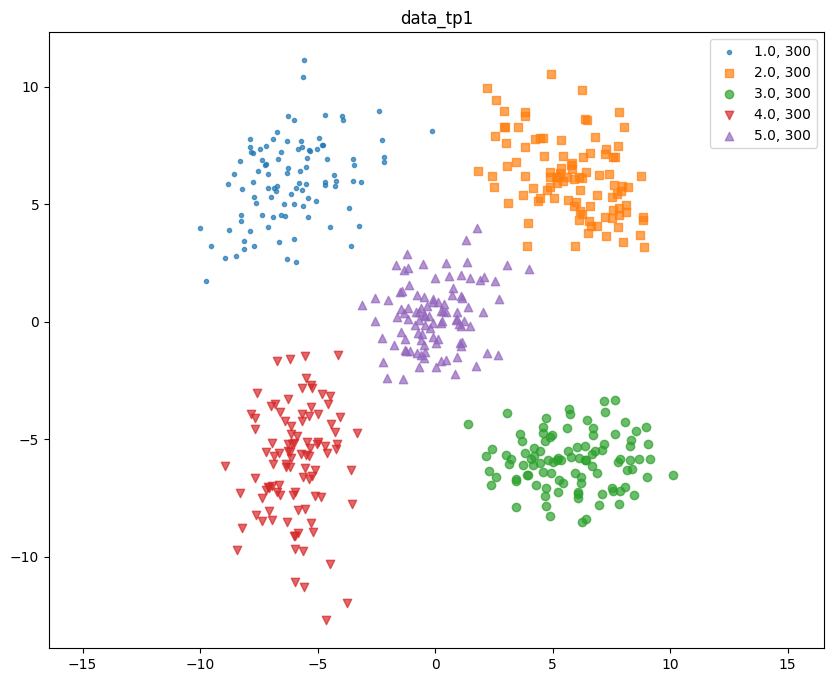

In [10]:
plt.figure()

classes = np.unique(y1_target)
# for classe in classes:
#     plt.scatter(X1[y1_target == classe, 0], X1[y1_target == classe, 1], label=f"class {classe}")

# plt.legend()

show(data_frame1, title="data_tp1")
for classe in classes:
   print(f"class {classe} mean: {X1[y1_target == classe].mean(axis=0)} count: {X1[y1_target == classe].shape[0]}")

## Estimation Gaussien

### Distance Euclidienne

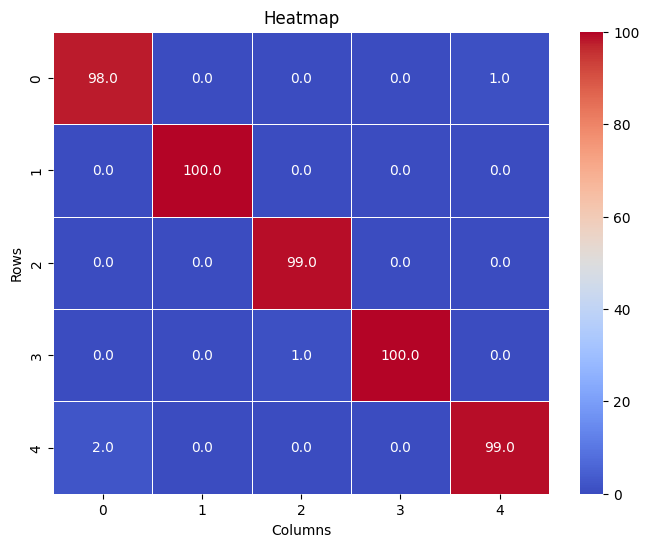

erreurs : 4
Pourcentage des erreurs : 0.8 %
matrices de confusion :
       0      1     2      3     4
0  98.0    0.0   0.0    0.0   1.0
1   0.0  100.0   0.0    0.0   0.0
2   0.0    0.0  99.0    0.0   0.0
3   0.0    0.0   1.0  100.0   0.0
4   2.0    0.0   0.0    0.0  99.0


(0.8,
       0      1     2      3     4
 0  98.0    0.0   0.0    0.0   1.0
 1   0.0  100.0   0.0    0.0   0.0
 2   0.0    0.0  99.0    0.0   0.0
 3   0.0    0.0   1.0  100.0   0.0
 4   2.0    0.0   0.0    0.0  99.0)

In [33]:
class EuclideanClassifier(Modele):
    def __init__(self):
        pass
    
    def fit(self, X, y):
        classes = np.unique(y)
        means = np.array([X[y == classe].mean(axis=0) for classe in classes])
        
        self.predictor = self._get_predictor(means)

    def _get_predictor(self, means):
        def predict(x):
            if len(x.shape) == 1:
                return np.argmin([np.linalg.norm(mean - x) for mean in means]) + 1
            return np.argmin([np.linalg.norm(mean - x, axis=1) for mean in means], axis=0)  + 1
        return predict


euclide_classifer = EuclideanClassifier()

euclide_classifer.fit(X1, y1_target)


validate(valid_data_frame1, euclide_classifer.predictor)

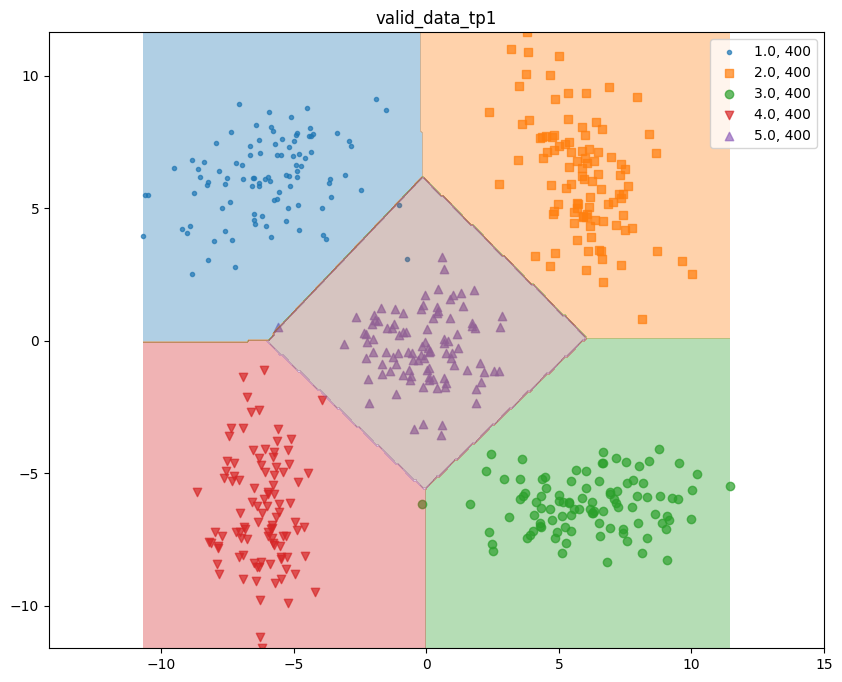

In [36]:
show(valid_data_frame1, title="valid_data_tp1")
euclide_classifer.plot_decision_multi(valid_data_frame1[["x1", "x2"]].to_numpy())

In [38]:
top_k_accuracy(X1, y1_target, euclide_classifer.predictor, k=1)

AxisError: axis 1 is out of bounds for array of dimension 1

## Distance de mahalanobis

In [28]:

class MahalanobisClassifier(Modele):
    def __init__(self):
        self.predictor = None
    
    def fit(self, X, y):
        classes = np.unique(y)
        means = np.array([X[y == classe].mean(axis=0) for classe in classes])
        covs = np.array([np.cov(X[y == classe].T, rowvar=True) for classe in classes])
            
        self.predictor = self._get_predictor(means, covs)

    def _get_predictor(self, means, covs, distance=lambda x, y, sigma: np.sum((x@np.linalg.inv(sigma))*y, axis=1)):
        def predict(x):
            if len(x.shape) == 1:
                x = np.expand_dims(x, axis=0)
                return np.argmin([distance(x-mean, x-mean, cov) for mean, cov in zip(means, covs)]) + 1
            return np.argmin([distance(x-mean, x-mean, cov) for mean, cov in zip(means, covs)], axis=0) + 1
        return predict

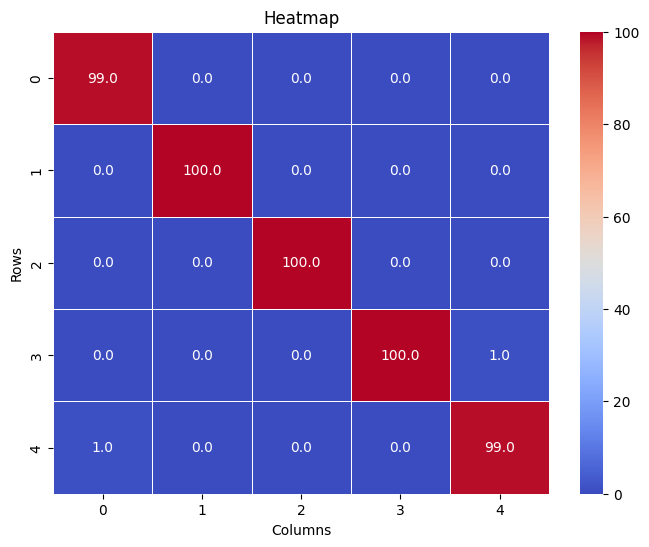

erreurs : 2
Pourcentage des erreurs : 0.4 %
matrices de confusion :
       0      1      2      3     4
0  99.0    0.0    0.0    0.0   0.0
1   0.0  100.0    0.0    0.0   0.0
2   0.0    0.0  100.0    0.0   0.0
3   0.0    0.0    0.0  100.0   1.0
4   1.0    0.0    0.0    0.0  99.0


(0.4,
       0      1      2      3     4
 0  99.0    0.0    0.0    0.0   0.0
 1   0.0  100.0    0.0    0.0   0.0
 2   0.0    0.0  100.0    0.0   0.0
 3   0.0    0.0    0.0  100.0   1.0
 4   1.0    0.0    0.0    0.0  99.0)

In [29]:
mahalanobis_classifier = MahalanobisClassifier()

mahalanobis_classifier.fit(X1, y1_target)


validate(valid_data_frame1, mahalanobis_classifier.predictor)


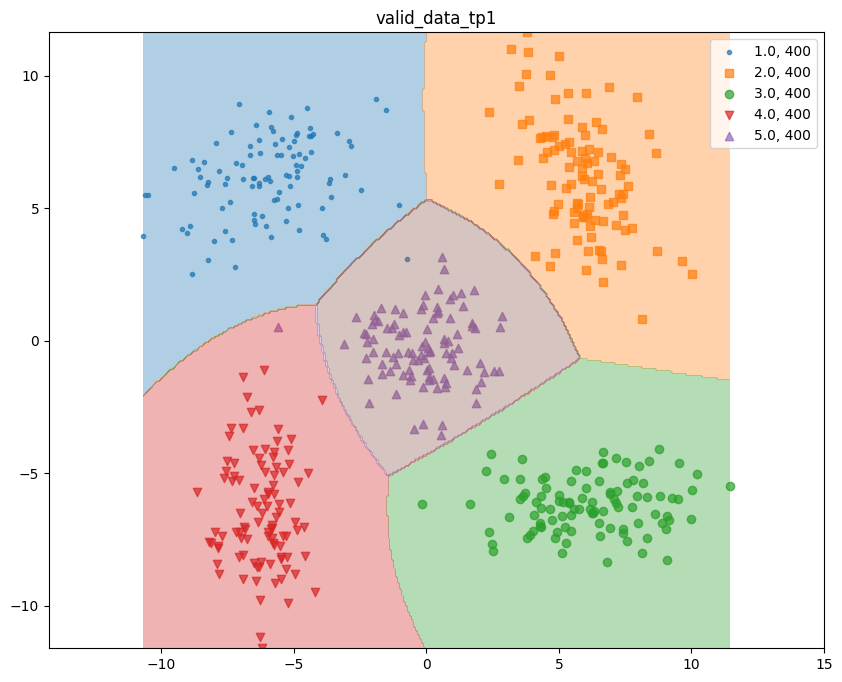

In [32]:
show(valid_data_frame1, title="valid_data_tp1")
mahalanobis_classifier.plot_decision_multi(valid_data_frame1[["x1", "x2"]].to_numpy())    

## Parzen

## K plus proches voisins

## Séperation Lineaire

In [1]:
#n